# Traffic Crash in Cinicnnati
by Tian Song  

## Introduction
Road crash fatalities and injuries are important matters to the public. According to the World Health Organization (WHO) 2018 global status report on road safety, nearly 1.35 million people die in road crashes each year and traffic crash injuries rank as the 8th leading cause of death in the world. The first step to tackling this problem is to understand more facts about traffic crashes. Knowing where, when, and how traffic crashes occur and who is involved will help identify the risk factors, locate the road traffic operational problems, and hence develop strategies to reduce crashes.

The purpose of this project is to investigate traffic crashes in the city of Cincinnati. The dataset is from the Cincinnati police department and provides detailed information on crashes from 2013 to 2018, including location, time of occurrence, people involved, car types, and weather and road conditions. Studying the data can help us understand where and when crashes tend to occur and the factors that affect the severity. Our analysis can be useful for both government agencies and corporations. For example, the police department can use our findings to optimize their operations. Auto insurance companies can use the evidence to improve their risk assessment. Finally, our findings may offer useful insights to government and non-profit organizations and help them better educate the public regarding road safety.


## Data Preparation
I downloaded the data from the Cincinnati open data portal (https://data.cincinnati-oh.gov/Safety/Traffic-Crash-Reports-CPD-/rvmt-pkmq). The data contains detailed information about traffic crashes that occurred from 2013 to 2018 in Cincinnati. Below are the definitions of variables used in the analysis:

 - Age: the age of person invovled in the crash
 - Community_Council_Neighborhood: The neighborhood defined by community councils
 - Crashdate: the date of the crash
 - Crashlocation: the location of the crash, e.g. four-way intersection, T-intersection, off ramp, and etc.
 - Crashseverity: the severity level of the crash: fatal injury, injury, and property damage only
 - Dayofweek: the day of the week
 - Gender: the gender of person invovled in the crash
 - InstanceID: Instance ID
 - Lightconditionprimary: the light condition when the crash occurred, e.g., daylight, dawn, dusk, and etc.
 - Mannerofcrash: the manner of the crash
 - Roadconditionsprimary: road condition, e.g., dry, wet, ice, and etc.
 - Roadcountour: type of road countour, e.g., straight level, straight grade, curve level, curve grade, and etc.
 - Roadsurface" type of road surface, e.g., concrete, blacktop, bituminous, asphalt, and etc. 
 - Weather: weather condition: clear, cloudy, rain, snow, and etc.
 - Unittype: The type of car involved in the crash
 
After importing the data into Python, I first dropped two unneeded columns. Then missing values are checked and removed from the dataset. The resulting dataset has 167,234 records (rows) and 24 variables (columns).

In [1]:
import pandas as pd
import numpy as np
crash=pd.read_csv('Traffic_Crash_Reports.csv')

#drop columns
crash.drop(['LOCALREPORTNO','ZIP'], axis=1, inplace=True)

#drop missings
crash.dropna(inplace=True)

#check and drop duplicates
crash.drop_duplicates(inplace=True)

crash.shape

C:\Users\songt\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (16,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(167234, 24)

I further examined the data and found the coding of categories was not consistent for seveal variables:  "Community_Council_Neighborhood", "Gender", "Lightconditionprimary", "Weather", and "Crashseverity". So, I recoded those variables before analysis.

In [2]:
#Data cleaning: recoding several columns(neighborhood, gender, lightcondition...)
# Neighborhood
def neigh_new(row):
    neigh = row['COMMUNITY_COUNCIL_NEIGHBORHOOD'].split('-')[0].strip()
    
    if neigh in ['DOWNTOWN']:
        neigh_new='C.B.D.'
    elif neigh in ['EAST PRICE HILL']:
        neigh_new='E. PRICE HILL'
    elif neigh.startswith('MOUNT'):
        neigh_new=neigh.replace('MOUNT','MT.')
    elif neigh in ['OTR']:
        neigh_new='OVER THE RHINE'
    elif neigh in ['WEST PRICE HILL']:
        neigh_new='W. PRICE HILL'
    else:
        neigh_new=neigh
    return neigh_new
crash['neigh_new']=crash.apply(neigh_new, axis=1)
crash['neigh_new'].value_counts().head(10)

C.B.D.             13117
WESTWOOD           12718
AVONDALE            8316
W. PRICE HILL       6918
CORRYVILLE          6682
WEST END            6538
WALNUT HILLS        6216
BOND HILL           6057
CAMP WASHINGTON     5890
NORTHSIDE           5806
Name: neigh_new, dtype: int64

In [3]:
#Gender
def gender_new(row):
    if row['GENDER'].startswith('F'):
        gender_new='FEMALE'
    elif row['GENDER'].startswith('M'):
        gender_new='MALE'
    else:
        gender_new='UNKNOWN'
    return gender_new
crash['Gender_R']=crash.apply(gender_new, axis=1)
crash['Gender_R'].value_counts()

MALE       90326
FEMALE     76907
UNKNOWN        1
Name: Gender_R, dtype: int64

In [4]:
#Light condition
def lightcondition(row):
    if row['LIGHTCONDITIONSPRIMARY'] in ['2 - DUSK']:
        light_condition='3 - DUSK'
    elif row['LIGHTCONDITIONSPRIMARY'] in ['3 - DARK - LIGHTED ROADWAY']:
        light_condition='4 - DARK - LIGHTED ROADWAY'
    elif row['LIGHTCONDITIONSPRIMARY'] in ['4 - DARK – ROADWAY NOT LIGHTED', '5 - DARK – ROADWAY NOT LIGHTIED']:
        light_condition='5 - DARK – ROADWAY NOT LIGHTED'
    elif row['LIGHTCONDITIONSPRIMARY'] in ['5 - DARK – UNKNOWN ROADWAY LIGHTING']:
        light_condition='6 - DARK – UNKNOWN ROADWAY LIGHTING'
    else:
        light_condition=row['LIGHTCONDITIONSPRIMARY']
    return light_condition
crash['light_condition']=crash.apply(lightcondition, axis=1)
crash['light_condition'].value_counts()

1 - DAYLIGHT                           120696
4 - DARK - LIGHTED ROADWAY              36770
3 - DUSK                                 4286
2 - DAWN                                 3492
5 - DARK – ROADWAY NOT LIGHTED           1386
6 - DARK – UNKNOWN ROADWAY LIGHTING       384
9 - UNKNOWN                               139
8 - OTHER                                  81
Name: light_condition, dtype: int64

In [5]:
#Crash Severity
def Severity(row):
    if row['CRASHSEVERITY'] in ['2 - SERIOUS INJURY SUSPECTED', '3 - MINOR INJURY SUSPECTED', '4 - INJURY POSSIBLE']:
        Severity='2 - INJURY'
    elif row['CRASHSEVERITY'] in ['5 - PROPERTY DAMAGE ONLY']:
        Severity='3 - PROPERTY DAMAGE ONLY (PDO)'
    else:
        Severity=row['CRASHSEVERITY']
    return Severity
crash['Severity']=crash.apply(Severity, axis=1)

In [6]:
#Weather
def weather(row):
    if row['WEATHER'] in ['5 - SLEET,HAIL']:
        weather='5 - SLEET, HAIL'
    else:
        weather=row['WEATHER']
    return weather
crash['weather']=crash.apply(weather, axis=1)
crash['weather'].value_counts()

1 - CLEAR                             106829
2 - CLOUDY                             31171
4 - RAIN                               24724
6 - SNOW                                3537
9 - OTHER/UNKNOWN                        349
5 - SLEET, HAIL                          330
3 - FOG, SMOG, SMOKE                     229
8 - BLOWING SAND, SOIL, DIRT, SNOW        33
7 - SEVERE CROSSWINDS                     32
Name: weather, dtype: int64

The original dataset contains the data for crashes in 2019. However, the majority of records do not have information on the location of crashes. Furthermore, starting from 2019, a new severity scale with five levels (three levels previously) was adopted. For consistency, I decided to exclude the 2019 data from analysis. 

In [7]:
#extract time information
crash['year']=pd.DatetimeIndex(crash['CRASHDATE']).year
crash['month']=pd.DatetimeIndex(crash['CRASHDATE']).month
crash['hour']=pd.DatetimeIndex(crash['CRASHDATE']).hour

In [8]:
#select data from 2013 to 2018
crash=crash[(crash['year']<2019) & (crash['year']>2012)]
crash['year'].value_counts()

crash=crash[crash['Gender_R']!='UNKNOWN']
crash['Gender_R'].value_counts()

MALE      89359
FEMALE    76125
Name: Gender_R, dtype: int64

In [9]:
#Each incident can have multiple rows since two or more vehicles could be involved. For plotting accident counts, only
#keep one row for each incident
crash_single=crash.drop_duplicates(subset='INSTANCEID', keep="first")

## Exploratory Data Analysis
In this section, to get a better understanding of the traffic crashes in Cincinnati, I investigate the following questions via data visualization:
 
 1. Where did the most traffic crashes occur in Cincinnati between 2013 and 2018?
 2. When is the peak time for traffic crashes?
 3. Does crash severity differ by gender and age?
 4. Does crash severity differ under different light conditions?
 5. Does crash severity differ under different weather conditions?
 6. Does crash severity differ under different crash locations?
 
First, Let's find which neighborhoods have more crashes.

In [10]:
#Where the most accidents occurred
crashcount=crash_single.groupby('neigh_new', as_index=False)['INSTANCEID'].count().rename(columns={'INSTANCEID': 'count'})

import geopandas
cincy_geo=geopandas.read_file("Cincinnati_Community_Council_Boundaries.shp")

import gdal
def shapefile2geojson(infile, outfile, fieldname):
    '''Translate a shapefile to GEOJSON.'''
    options = gdal.VectorTranslateOptions(format="GeoJSON",
                                          dstSRS="EPSG:4326")
    gdal.VectorTranslate(outfile, infile, options=options)
    
shapefile2geojson('Cincinnati_Community_Council_Boundaries.shp', 'Cincinnati_Community_Council_Boundaries.json', 'geometry')

cincy_geojson = r'Cincinnati_Community_Council_Boundaries.json'

import folium
# Cincinnti latitude and longitude values
latitude = 39.1531
longitude = -84.5120
# create map
cincy_map = folium.Map(location=[latitude, longitude], zoom_start=12)

#create choropleth map
cincy_map.choropleth(
    geo_data=cincy_geojson,
    data=crashcount,
    columns=['neigh_new', 'count'],
    key_on='feature.properties.NEIGH',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Number of Crashes'
    )

#Add title
title_html = '''
             <h3 align="center" style="font-size:14px"><b>Figure 1. Number of Crashes by Neighboorhood in Cincinnati</b></h3>
             '''
cincy_map.get_root().html.add_child(folium.Element(title_html))

# display map
cincy_map

To see which neighborhoods have more crashes, I created a choropleth map of Cincinati to show how the number of crashes varies across neighborhoods. In the map above, a darker shade indicates a higher number of crashes. In our case, Cincinnati downtown (C.B.D) and Westwood are the two neighborhoods with the largest number of crashes, followed by Avondale and West Price Hill. 

Next, I am interested in when the peak time is for crashes. 

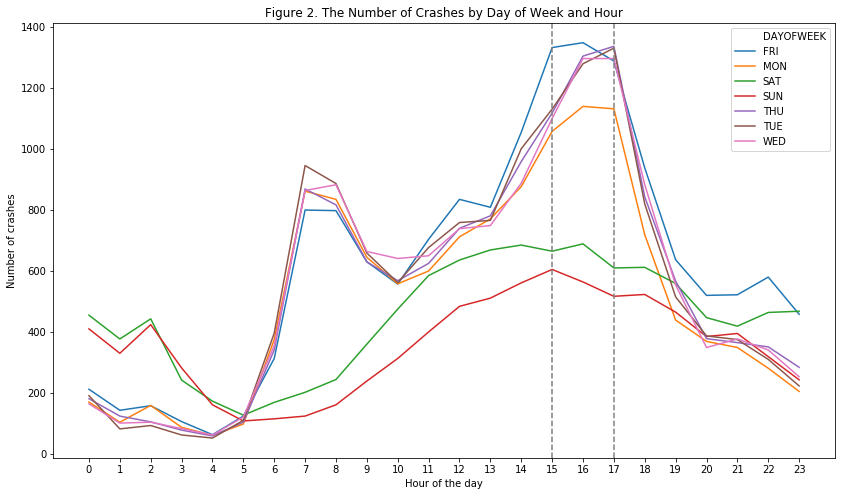

In [11]:
#When the most accidents occured
crash_hour=crash_single.groupby(['DAYOFWEEK','hour'], as_index=False)['INSTANCEID'].count().rename(columns={'INSTANCEID': 'count'})

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(14,8))
sns.lineplot(x='hour', y='count', hue='DAYOFWEEK', data=crash_hour);
plt.xticks(np.arange(0, 24, 1));
plt.title("Figure 2. The Number of Crashes by Day of Week and Hour")
plt.xlabel("Hour of the day")
plt.ylabel("Number of crashes")
plt.axvline(x=15, color='gray', linestyle='--');
plt.axvline(x=17, color='gray', linestyle='--');

Figure 2 shows the number of crashes by the day of the week and the hour of the day. We can see the peak time is between 3pm and 5pm on a weekday. The finding is perhaps not very surprising. This period is normally the busiest time for the road, and the number of crashes increases with the number of drivers on the road. Moreover, drivers might be affected by "late afternoon" fatigue during this time.

Figure 3 below shows the number of crashes by gender and age group. 

In [12]:
#Who involved in the accidents
crash_who=crash.groupby(['AGE', 'Gender_R','Severity'], as_index=False)['INSTANCEID'].count().rename(columns={'INSTANCEID': 'Count'})

def divergingcount(row):
    if row['Gender_R']=='MALE':
        Count_plot=row['Count']*(-1)
    else:
        Count_plot=row['Count']
    return Count_plot
crash_who['Count_plot']=crash_who.apply(divergingcount,axis=1)

In [13]:
crash_m=crash_who[crash_who['Gender_R']=='MALE']
crash_f=crash_who[crash_who['Gender_R']=='FEMALE']
crash_mf=pd.merge(crash_m, crash_f, on=['AGE','Severity'])
crash_fatal=crash_mf[crash_mf['Severity']=="1 - FATAL INJURY"].reset_index()
crash_injury=crash_mf[crash_mf['Severity']=="2 - INJURY"].reset_index()

crash_all=crash.groupby(['AGE','Gender_R'], as_index=False)['INSTANCEID'].count().rename(columns={'INSTANCEID': 'Count'})
crash_all['Count_plot']=crash_all.apply(divergingcount,axis=1)
crash_allm=crash_all[crash_all['Gender_R']=='MALE']
crash_allf=crash_all[crash_all['Gender_R']=='FEMALE']
crash_allmf=pd.merge(crash_allm, crash_allf, on='AGE')

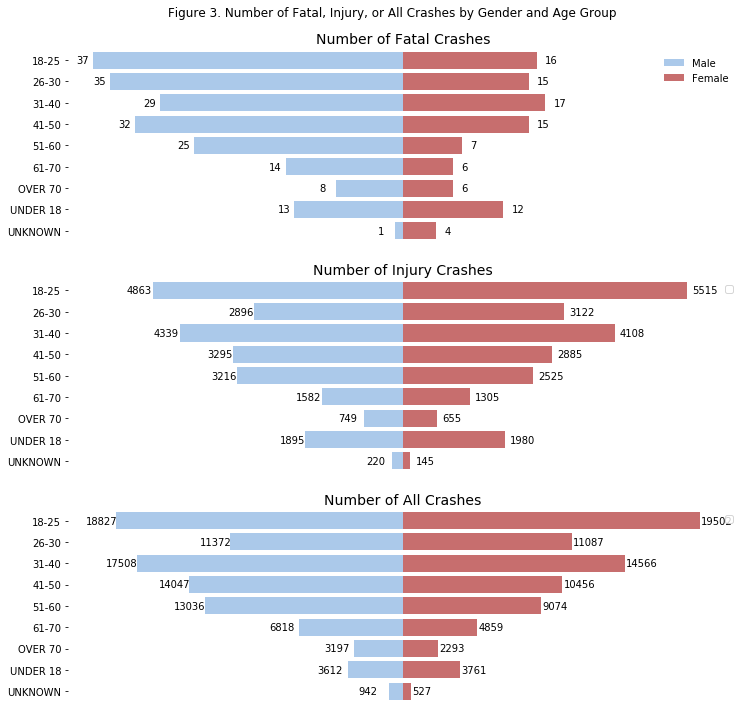

In [14]:
f, ax = plt.subplots(3,1,figsize=(12, 12))
f.suptitle("Figure 3. Number of Fatal, Injury, or All Crashes by Gender and Age Group", y=0.93)
# Plot the fatal crashes by male
sns.set_color_codes("pastel")
sns.barplot(x="Count_plot_x", y="AGE", data=crash_fatal, label="Male", color="b", ax=ax[0])
for x,y,tex in zip(crash_fatal.Count_plot_x, crash_fatal.index, crash_fatal.Count_x):
    t=ax[0].text(x-2,y,tex, horizontalalignment='left', verticalalignment='center')

# Plot the fatal crashes by female
sns.set_color_codes("muted")
sns.barplot(x="Count_plot_y", y="AGE", data=crash_fatal, label="Female", color="r", ax=ax[0])
for x,y,tex in zip(crash_fatal.Count_plot_y, crash_fatal.index, crash_fatal.Count_y):
    t=ax[0].text(x+1,y,tex, horizontalalignment='left', verticalalignment='center')

# Add a legend and informative axis label
ax[0].legend(loc='upper right',frameon=False)
ax[0].set(xlim=(-40, 40),  xticklabels=[], xticks = [], xlabel="",
       ylabel="")
ax[0].set_title("Number of Fatal Crashes",fontdict={'size':14})
 

# Plot the injury crashes by male
sns.set_color_codes("pastel")
sns.barplot(x="Count_plot_x", y="AGE", data=crash_injury, label="Male", color="b", ax=ax[1])
for x,y,tex in zip(crash_injury.Count_plot_x, crash_injury.index, crash_injury.Count_x):
    t=ax[1].text(x-500,y,tex, horizontalalignment='left', verticalalignment='center')

# Plot Plot the injury crashes by female
sns.set_color_codes("muted")
sns.barplot(x="Count_plot_y", y="AGE", data=crash_injury, label="Female", color="r", ax=ax[1])
for x,y,tex in zip(crash_injury.Count_plot_y, crash_injury.index, crash_injury.Count_y):
    t=ax[1].text(x+100,y,tex, horizontalalignment='left', verticalalignment='center')

# Add a legend and informative axis label
ax[1].legend("")
ax[1].set(xlim=(-6500, 6500), xticklabels=[], xticks = [], xlabel="", ylabel="")
ax[1].set_title("Number of Injury Crashes",fontdict={'size':14})


# Plot all the crashes by male
sns.set_color_codes("pastel")
sns.barplot(x="Count_plot_x", y="AGE", data=crash_allmf, label="Male", color="b", ax=ax[2])
for x,y,tex in zip(crash_allmf.Count_plot_x, crash_allmf.index, crash_allmf.Count_x):
    t=ax[2].text(x-2000,y,tex, horizontalalignment='left', verticalalignment='center')

# Plot all the crashes by female
sns.set_color_codes("muted")
sns.barplot(x="Count_plot_y", y="AGE", data=crash_allmf, label="Female", color="r", ax=ax[2])
for x,y,tex in zip(crash_allmf.Count_plot_y, crash_allmf.index, crash_allmf.Count_y):
    t=ax[2].text(x+100,y,tex, horizontalalignment='left', verticalalignment='center')

# Add a legend and informative axis label
ax[2].legend("")
ax[2].set(xlim=(-22000, 22000),xticklabels=[], xticks = [], xlabel="", ylabel="")
ax[2].set_title("Number of All Crashes",fontdict={'size':14})

sns.despine(left=True, bottom=True) 


In general, more males are involved in fatal crashes than females, except for those who are under 18 or over 70. For those two age groups, the number of crashes are very close. For injury crashes, it seems that females are somewaht more likely to be involved than males if under 30 and less likely if otherwise.

Finally, we examine how difffernt conditions would affect crash severity. Specifically, we look at weather condition, light condition, and the location of crashes. Figure 4 to 6 shows the percentage of fatal or injury crashes in all crashes under different conditions.

In [15]:
#Conditions: Weather, light condition, and crash location

crash_w=crash_single.groupby(['weather','Severity'], as_index=False)['INSTANCEID'].count().rename(columns={'INSTANCEID': 'Count'})
w_sum=crash.groupby(['weather'], as_index=False)['INSTANCEID'].count().rename(columns={'INSTANCEID': 'Sum'})
crash_w=pd.merge(crash_w,w_sum, on='weather')
crash_w['Pct']=crash_w['Count']/crash_w['Sum']*100
crash_wf=crash_w[crash_w['Severity']=="1 - FATAL INJURY"].reset_index()
crash_wi=crash_w[crash_w['Severity']=="2 - INJURY"].reset_index()

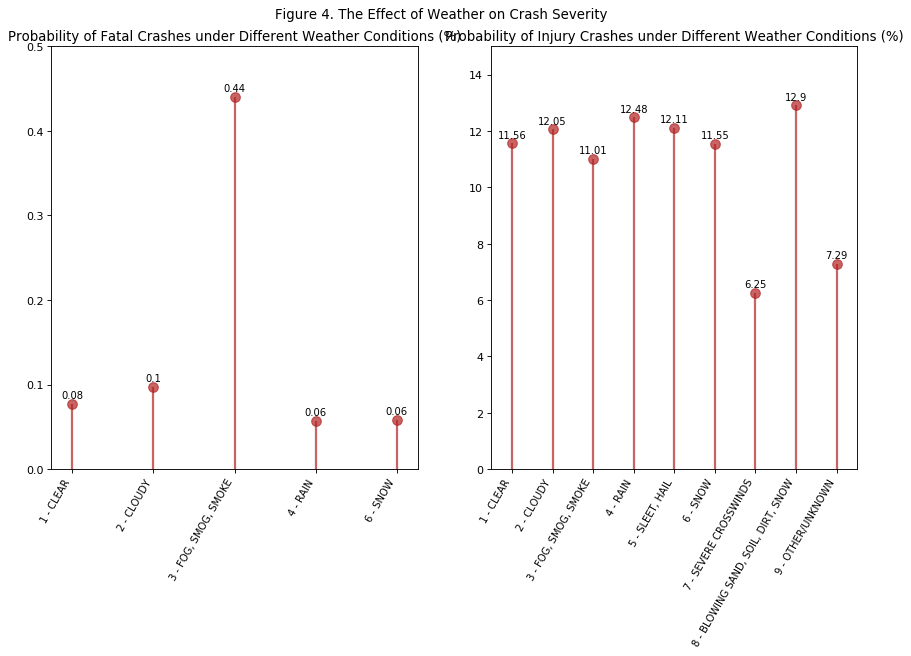

In [16]:
fig, ax= plt.subplots(1,2,figsize=(13,7), dpi= 80)
fig.suptitle("Figure 4. The Effect of Weather on Crash Severity", y=0.95)

ax[0].vlines(x=crash_wf.index, ymin=0, ymax=crash_wf.Pct, color='firebrick', alpha=0.7, linewidth=2)
ax[0].scatter(x=crash_wf.index, y=crash_wf.Pct, s=75, color='firebrick', alpha=0.7)
# Title, Label, Ticks and Ylim
ax[0].set_title('Probability of Fatal Crashes under Different Weather Conditions (%)', fontdict={'size':12})
ax[0].set_xticks(crash_wf.index)
ax[0].set_xticklabels(crash_wf.weather, rotation=60, fontdict={'horizontalalignment': 'right', 'size':9})
ax[0].set_ylim(0,0.5)

# Annotate
for row in crash_wf.itertuples():
    ax[0].text(row.Index, row.Pct+0.01, s=round(row.Pct, 2), horizontalalignment= 'center', verticalalignment='center', fontsize=9)


ax[1].vlines(x=crash_wi.index, ymin=0, ymax=crash_wi.Pct, color='firebrick', alpha=0.7, linewidth=2)
ax[1].scatter(x=crash_wi.index, y=crash_wi.Pct, s=75, color='firebrick', alpha=0.7)
# Title, Label, Ticks and Ylim
ax[1].set_title('Probability of Injury Crashes under Different Weather Conditions (%)', fontdict={'size':12})
ax[1].set_xticks(crash_wi.index)
ax[1].set_xticklabels(crash_wi.weather, rotation=60, fontdict={'horizontalalignment': 'right', 'size':9})
ax[1].set_ylim(0,15)

# Annotate
for row in crash_wi.itertuples():
    ax[1].text(row.Index, row.Pct+0.3, s=round(row.Pct, 2), horizontalalignment= 'center', verticalalignment='center', fontsize=9)


From Figure 4, we can see when there is fog, smog or smoke, the percentage of fatal crashes among all crashes is very high (0.44%), compared to other weather conditions. The percentage is significantly lower for the other conditions (0.06% to 0.08%). The percentage of injury crashes is mostly between 11% and 13% under most of weather. One exception is severe crosswinds, which has the lowest percentage of 6.25%.


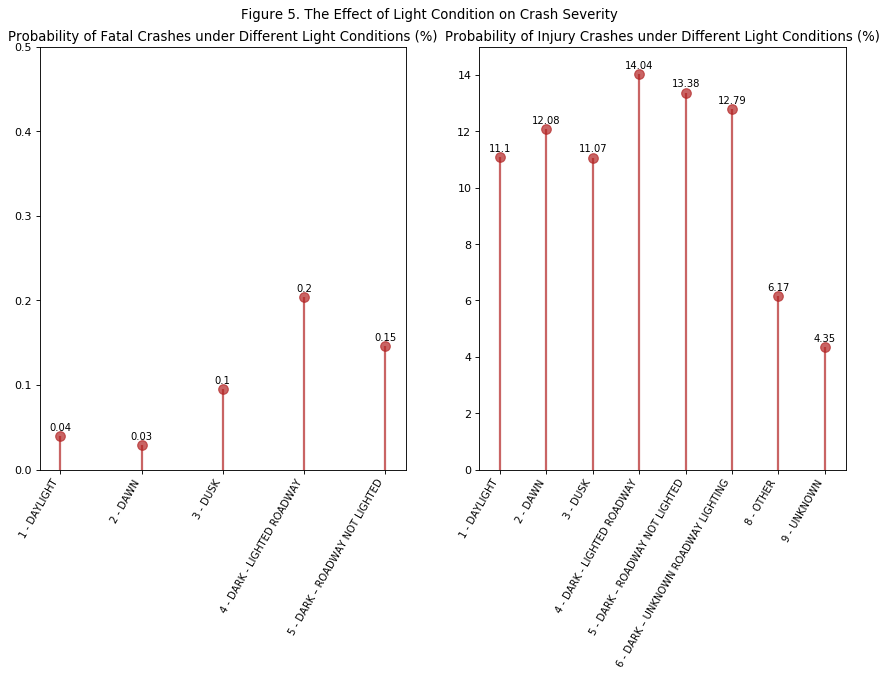

In [17]:
crash_l=crash_single.groupby(['light_condition','Severity'], as_index=False)['INSTANCEID'].count().rename(columns={'INSTANCEID': 'Count'})
l_sum=crash.groupby(['light_condition'], as_index=False)['INSTANCEID'].count().rename(columns={'INSTANCEID': 'Sum'})
crash_l=pd.merge(crash_l,l_sum, on='light_condition')
crash_l['Pct']=crash_l['Count']/crash_l['Sum']*100
crash_lf=crash_l[crash_l['Severity']=="1 - FATAL INJURY"].reset_index()
crash_li=crash_l[crash_l['Severity']=="2 - INJURY"].reset_index()

fig, ax= plt.subplots(1,2,figsize=(13,7), dpi= 80)
fig.suptitle("Figure 5. The Effect of Light Condition on Crash Severity", y=0.95)

ax[0].vlines(x=crash_lf.index, ymin=0, ymax=crash_lf.Pct, color='firebrick', alpha=0.7, linewidth=2)
ax[0].scatter(x=crash_lf.index, y=crash_lf.Pct, s=75, color='firebrick', alpha=0.7)
# Title, Label, Ticks and Ylim
ax[0].set_title('Probability of Fatal Crashes under Different Light Conditions (%)', fontdict={'size':12})
ax[0].set_xticks(crash_lf.index)
ax[0].set_xticklabels(crash_lf.light_condition, rotation=60, fontdict={'horizontalalignment': 'right', 'size':9})
ax[0].set_ylim(0,0.5)

# Annotate
for row in crash_lf.itertuples():
    ax[0].text(row.Index, row.Pct+0.01, s=round(row.Pct, 2), horizontalalignment= 'center', verticalalignment='center', fontsize=9)


ax[1].vlines(x=crash_li.index, ymin=0, ymax=crash_li.Pct, color='firebrick', alpha=0.7, linewidth=2)
ax[1].scatter(x=crash_li.index, y=crash_li.Pct, s=75, color='firebrick', alpha=0.7)
# Title, Label, Ticks and Ylim
ax[1].set_title('Probability of Injury Crashes under Different Light Conditions (%)', fontdict={'size':12})
ax[1].set_xticks(crash_li.index)
ax[1].set_xticklabels(crash_li.light_condition, rotation=60, fontdict={'horizontalalignment': 'right', 'size':9})
ax[1].set_ylim(0,15)

# Annotate
for row in crash_li.itertuples():
    ax[1].text(row.Index, row.Pct+0.3, s=round(row.Pct, 2), horizontalalignment= 'center', verticalalignment='center', fontsize=9)


Figure 5 shows the percentage of fatal or injury crashes under different light conditions. The pattern is similar for both types of crashes. When it is dark, crashes tend to be more severe, leading to death or injury. However, a suprising finding is that when it is dark, the chance of death or injuries is somewhat higher when the roadway is lighted.

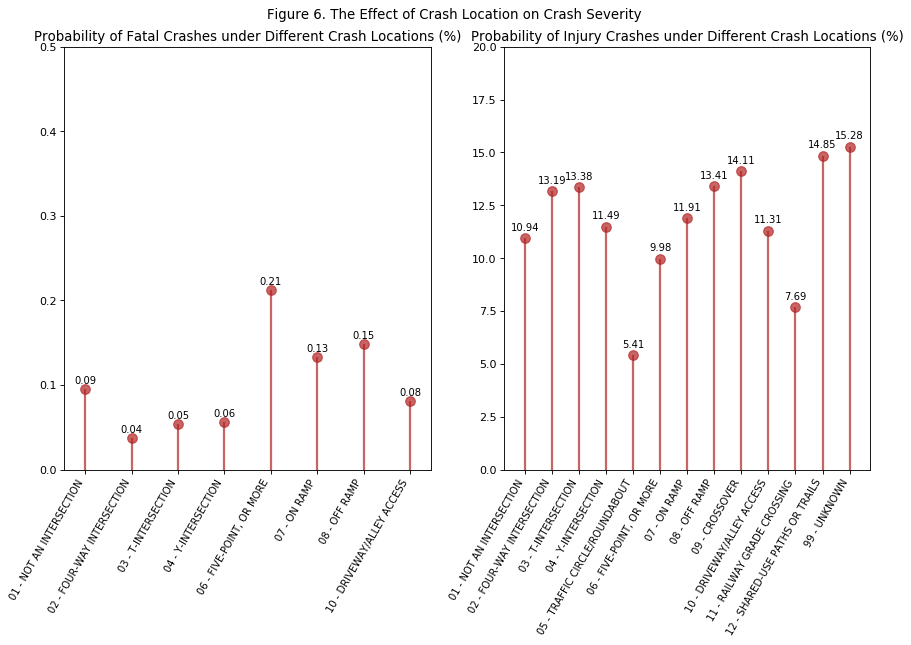

In [19]:
crash_a=crash_single.groupby(['CRASHLOCATION','Severity'], as_index=False)['INSTANCEID'].count().rename(columns={'INSTANCEID': 'Count'})
a_sum=crash.groupby(['CRASHLOCATION'], as_index=False)['INSTANCEID'].count().rename(columns={'INSTANCEID': 'Sum'})
crash_a=pd.merge(crash_a,a_sum, on='CRASHLOCATION')
crash_a['Pct']=crash_a['Count']/crash_a['Sum']*100
crash_af=crash_a[crash_a['Severity']=="1 - FATAL INJURY"].reset_index()
crash_ai=crash_a[crash_a['Severity']=="2 - INJURY"].reset_index()

fig, ax= plt.subplots(1,2,figsize=(13,7), dpi= 80)
fig.suptitle("Figure 6. The Effect of Crash Location on Crash Severity", y=0.95)

ax[0].vlines(x=crash_af.index, ymin=0, ymax=crash_af.Pct, color='firebrick', alpha=0.7, linewidth=2)
ax[0].scatter(x=crash_af.index, y=crash_af.Pct, s=75, color='firebrick', alpha=0.7)
# Title, Label, Ticks and Ylim
ax[0].set_title('Probability of Fatal Crashes under Different Crash Locations (%)', fontdict={'size':12})
ax[0].set_xticks(crash_af.index)
ax[0].set_xticklabels(crash_af.CRASHLOCATION, rotation=60, fontdict={'horizontalalignment': 'right', 'size':9})
ax[0].set_ylim(0,0.5)

# Annotate
for row in crash_af.itertuples():
    ax[0].text(row.Index, row.Pct+0.01, s=round(row.Pct, 2), horizontalalignment= 'center', verticalalignment='center', fontsize=9)


ax[1].vlines(x=crash_ai.index, ymin=0, ymax=crash_ai.Pct, color='firebrick', alpha=0.7, linewidth=2)
ax[1].scatter(x=crash_ai.index, y=crash_ai.Pct, s=75, color='firebrick', alpha=0.7)
# Title, Label, Ticks and Ylim
ax[1].set_title('Probability of Injury Crashes under Different Crash Locations (%)', fontdict={'size':12})
ax[1].set_xticks(crash_ai.index)
ax[1].set_xticklabels(crash_ai.CRASHLOCATION, rotation=60, fontdict={'horizontalalignment': 'right', 'size':9})
ax[1].set_ylim(0,20)

# Annotate
for row in crash_ai.itertuples():
    ax[1].text(row.Index, row.Pct+0.5, s=round(row.Pct, 2), horizontalalignment= 'center', verticalalignment='center', fontsize=9)


Figure 6 displays the effect of crash location on crash severity. When crashes occur in five-pioint or more intersection or highway ramp, the chance of fatal crashes is the highest, ranging from 0.13% to 0.21%. On the other hand, the likelihood of injuries is the highest in the shared-use paths or trails and crosscovers. In those locations, drivers are more likely to get confused and forget the rules of the road.

## Modeling
In this section, we will perform two sets of model estimation to understand the crashes:

 - 1. What factors have significant effects on crash severity? 
      
      We split the data into training period and testing period. Using the training set, we first estimate an ordered probit regression model, with severity as the dependent variable (non-injury, injury, and fatal) and a group of factors as the predictors (gender, car type, light condition, crash location, weather, and etc). Then, we use the predictors from testing period to forecast crash severity and evaluate the model's out-of-sample accuracy.
      
      
 - 2. Estimate the ocurrence intensity of crashes in Cincinnati.
 
      For each day in our sample, we first construct the frequencies matrix of crashes for all combinations of a given set of predictors (e.g., hour, weather, and location). We then run possion regressions to estimate the occurence intensity of crashes with crash counts as the dependent variable.